> 基于规则的笔记。

In [1]:
%pylab inline
import pandas as pd
import datetime as dt

Populating the interactive namespace from numpy and matplotlib


In [2]:
u = pd.read_csv('../data/2nd/tianchi_mobile_recommend_train_user_filtered.csv', index_col=['user_id', 'item_id'])

In [3]:
def f1(pred, ref):
    """ Evaluate the F1 value of the prediction set and reference set.
    :param pred: the prediction set.
    :param ref:  the reference set.
    :return: the F1 value.
    """
    pred_len = float(len(pred))
    ref_len = float(len(ref))
    intersected_len = len(pred.intersection(ref))
    precision = intersected_len / pred_len
    recall = intersected_len / ref_len
    print "Hits:", intersected_len
    print "Precision:", precision
    print "Recall:", recall
    return 2 * precision * recall / float(precision + recall)

## 加入收藏隔天购买

In [3]:
ref = set(u[(u.date == '2014-12-17') & (u.behavior_type == 4)].index)
pred = set(u[(u.date == '2014-12-16') & (u.hour >= 17) & ((u.behavior_type == 3) | (u.behavior_type == 3))].index)
f1(pred, ref)

Hits: 26
Precision: 0.0491493383743
Recall: 0.0663265306122


0.05646036916395222

In [6]:
print '总购买量：', len(u[(u.date == '2014-12-17') & (u.behavior_type == 4)])

总购买量： 432


## 转化率

In [65]:
def transrate(df, date, behavior1, behavior2, days=1):
    prevdate = (dt.datetime.strptime(date, '%Y-%m-%d') - dt.timedelta(days)).strftime('%Y-%m-%d')
    items_users1 = df[(df.date == prevdate) & (df.behavior_type == behavior1)].groupby(['item_id', 'user_id']).size()
    items_users2 = df[(df.date == date) & (df.behavior_type == behavior2)].groupby(['item_id', 'user_id']).size()
    set1 = set(items_users1.index)
    set2 = set(items_users2.index)
    interset = set1.intersection(set2)
    items1 = items_users1[items_users1.index.isin(interset)].groupby(level=0).sum()
    items2 = items_users1.groupby(level=0).sum()
    return items1, items2

In [76]:
def inspect_transrate_3days(behavior1=3, behavior2=4):
    tmp1 = []
    tmp2 = []
    for date in ['2014-12-15', '2014-12-16', '2014-12-17']:
        t = transrate(u.reset_index(), '2014-12-17', behavior1, behavior2)
        tmp1.append(t[0])
        tmp2.append(t[1])
    sum1 = sum(tmp1)
    sum2 = sum(tmp2)
    return pd.DataFrame({'prev': sum1, 'next': sum2, 'transrate': sum1 / sum2})

In [77]:
tdf = inspect_transrate_3days(3, 4)

In [4]:
u.reset_index(inplace=True)

In [5]:
s = u[u.behavior_type==4].groupby('item_id').size() / u[u.behavior_type==3].groupby('item_id').size()

In [6]:
len(s[s<0.5])

840

In [7]:
len(s[s>0.5])

4909

In [8]:
len(s[s>1])

698

In [9]:
len(s)

31916

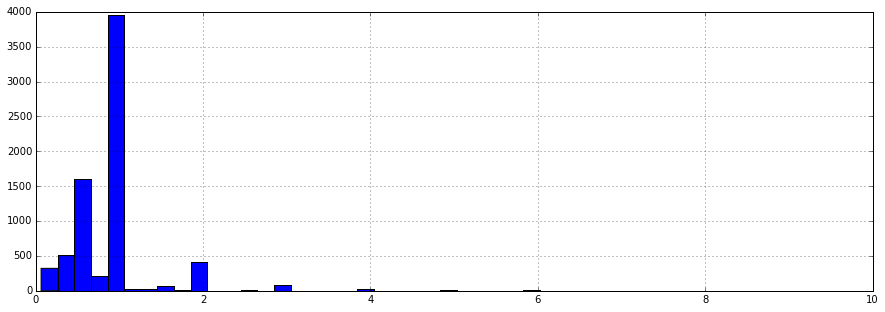

In [28]:
s.hist(bins=50, figsize=(15, 5))

In [24]:
s[s>9]

item_id
157342738    10
dtype: float64

In [4]:
u.reset_index(inplace=True)

In [5]:
u[u.item_id==198121978].sort(['date', 'hour'])

,user_id,item_id,behavior_type,user_geohash,item_category,hour,date
175716,41745786,198121978,1,95f6sm9,4245,9,2014-11-27
1172421,41745786,198121978,1,95f6sia,4245,9,2014-11-27
1009426,92848895,198121978,1,NaN,4245,18,2014-11-29
1281006,92848895,198121978,1,NaN,4245,18,2014-11-29
31223,72515822,198121978,1,95cgk5h,4245,19,2014-12-12
352612,5626464,198121978,1,95llqwq,4245,19,2014-12-12
470461,72515822,198121978,1,95cgk4n,4245,19,2014-12-12
1347107,5626464,198121978,1,95llp3b,4245,19,2014-12-12
1391630,72515822,198121978,1,95cgk6p,4245,19,2014-12-12
447441,41745786,198121978,1,NaN,4245,1,2014-12-16
